# Airbnb Price prediction model using feature selection methods.

Connecting to goggle drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [ ]:
nyc_listings= pd.read_csv('/gdrive/MyDrive/Practicum/Datasets/Newyork-2021/nyc_listings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
nyc_listings.shape

(38277, 74)

##Data Understanding and Cleaning

In [ ]:
nyc_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  int64  
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

Deleting unwanted columns which are not required for predicting prices

In [ ]:
unwanted_columns = ['id', 
                   'calendar_updated',
                    'host_location',
                   'listing_url', 
                   'scrape_id', 
                   'host_id',
                   'picture_url', 
                   'host_url', 
                   'host_thumbnail_url', 
                   'host_picture_url', 'host_name','license','name', 'last_scraped','availability_365', 'host_listings_count','host_acceptance_rate','host_about','neighbourhood_group_cleansed','neighborhood_overview' ,'bathrooms','review_scores_accuracy','review_scores_rating','host_neighbourhood','neighbourhood','minimum_minimum_nights','review_scores_accuracy', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_60', 'calendar_last_scraped', 'number_of_reviews_l30d', 'first_review','last_review', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
nyc_listings.drop(unwanted_columns, axis=1, inplace=True)

In [ ]:
nyc_listings.shape

(38277, 33)

Checking the target column "PRICE"

In [ ]:
nyc_listings.price

0        $150.00
1         $75.00
2         $60.00
3        $275.00
4         $68.00
          ...   
38272     $79.00
38273     $76.00
38274    $116.00
38275    $106.00
38276    $689.00
Name: price, Length: 38277, dtype: object

In [ ]:
#removing special characters
nyc_listings['price'] = nyc_listings['price'].replace({r'\$':'', r'\,':''}, regex = True)
nyc_listings.price

0        150.00
1         75.00
2         60.00
3        275.00
4         68.00
          ...  
38272     79.00
38273     76.00
38274    116.00
38275    106.00
38276    689.00
Name: price, Length: 38277, dtype: object

In [ ]:
#converting into float datatype
nyc_listings['price'] = nyc_listings['price'].astype(np.float)
nyc_listings.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


0        150.0
1         75.0
2         60.0
3        275.0
4         68.0
         ...  
38272     79.0
38273     76.0
38274    116.0
38275    106.0
38276    689.0
Name: price, Length: 38277, dtype: float64

Dealing with missing data

In [ ]:
nyc_listings.isnull().sum().sort_values(ascending=False)

host_response_time                              17193
host_response_rate                              17193
bedrooms                                         3975
beds                                             2405
description                                      1192
bathrooms_text                                    107
host_total_listings_count                          34
host_has_profile_pic                               34
host_identity_verified                             34
host_since                                         34
host_is_superhost                                  34
minimum_nights_avg_ntm                             18
maximum_nights_avg_ntm                             18
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count                      0
instant_bookable                                    0
number_of_reviews_ltm                               0
number_of_reviews           

In [ ]:
#checking % of missing values
missing_percent_nyc = nyc_listings.isnull().sum(axis =0) /nyc_listings.shape[0] *100
missing_percent_nyc

description                                      3.114142
host_since                                       0.088826
host_response_time                              44.917313
host_response_rate                              44.917313
host_is_superhost                                0.088826
host_total_listings_count                        0.088826
host_verifications                               0.000000
host_has_profile_pic                             0.088826
host_identity_verified                           0.088826
neighbourhood_cleansed                           0.000000
latitude                                         0.000000
longitude                                        0.000000
property_type                                    0.000000
room_type                                        0.000000
accommodates                                     0.000000
bathrooms_text                                   0.279541
bedrooms                                        10.384826
beds          

(array([29.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.        ,  4.49173133,  8.98346265, 13.47519398, 17.96692531,
        22.45865663, 26.95038796, 31.44211929, 35.93385062, 40.42558194,
        44.91731327]),
 <a list of 10 Patch objects>)

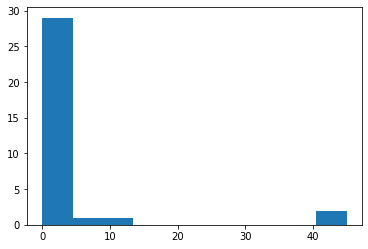

In [ ]:
import matplotlib.pyplot as plt
plt.hist(missing_percent_nyc)

From the histogram of number of missing value across columns, I decide to drop all the columns with more than 20% of samples are missing

In [ ]:
# get the list of all columns with more than 20% samples has missing value 
col_drop_nyc = missing_percent_nyc[missing_percent_nyc > 20].index
col_drop_nyc

Index(['host_response_time', 'host_response_rate'], dtype='object')

In [ ]:
# drop those columns 
nyc_listings = nyc_listings.drop(col_drop_nyc, axis =1 )

In [ ]:
# look at the data with few missing value 
few_missing_col_nyc = missing_percent_nyc[(missing_percent_nyc>0) & (missing_percent_nyc <0.2)].index.tolist()
few_missing_col_nyc

#listings[few_missing_col]

['host_since',
 'host_is_superhost',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

From the histogram of number of missing value across columns, I decide to drop all the columns with more than 20% of samples are missing

In [ ]:
nyc_listings.isnull().sum().sort_values(ascending=False)

bedrooms                                        3975
beds                                            2405
description                                     1192
bathrooms_text                                   107
host_total_listings_count                         34
host_has_profile_pic                              34
host_identity_verified                            34
host_is_superhost                                 34
host_since                                        34
minimum_nights_avg_ntm                            18
maximum_nights_avg_ntm                            18
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
instant_bookable                                   0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_90                                    0
has_availability                              

In [ ]:
nyc_listings.dtypes

description                                      object
host_since                                       object
host_is_superhost                                object
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [ ]:
nyc_listings.bathrooms_text

0                1 bath
1                1 bath
2                   NaN
3             1.5 baths
4                1 bath
              ...      
38272     1 shared bath
38273     1 shared bath
38274    1 private bath
38275               NaN
38276           4 baths
Name: bathrooms_text, Length: 38277, dtype: object

In [ ]:
#extracted bath numbers from bathrooms_text 
nyc_listings["bath"] = nyc_listings["bathrooms_text"].str.extract("(\d*\.?\d+)", expand=True)

In [ ]:
#drop bathroom_text
nyc_listings = nyc_listings.drop(columns=['bathrooms_text'])

In [ ]:
#converting bath from integer to float
nyc_listings['bath'] = nyc_listings['bath'].astype(float)

In [ ]:
nyc_listings.bath

0        1.0
1        1.0
2        NaN
3        1.5
4        1.0
        ... 
38272    1.0
38273    1.0
38274    1.0
38275    NaN
38276    4.0
Name: bath, Length: 38277, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy = 'mean')

numeric_col = ['beds','bedrooms','host_total_listings_count','minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'bath']
 
data = imputer1.fit_transform(nyc_listings[numeric_col])

nyc_listings[numeric_col] = pd.DataFrame(data, columns = numeric_col)

nyc_listings[numeric_col].head()

,beds,bedrooms,host_total_listings_count,minimum_nights_avg_ntm,maximum_nights_avg_ntm,bath
0,1.0,1.323567,8.0,30.0,1125.0,1.000000
1,3.0,1.000000,1.0,1.0,730.0,1.000000
2,1.0,1.000000,1.0,30.0,730.0,1.152714
3,2.0,2.000000,1.0,5.0,1125.0,1.500000
4,1.0,1.000000,1.0,2.0,14.0,1.000000


In [ ]:
#categorical
categorical_col = ['host_is_superhost','host_identity_verified', 'host_has_profile_pic']

nyc_listings[categorical_col].head()

,host_is_superhost,host_identity_verified,host_has_profile_pic
0,f,t,t
1,f,t,t
2,f,t,t
3,f,t,t
4,f,f,t


In [ ]:
# initiate the imputer 

imputer2 = SimpleImputer(strategy = 'most_frequent')

data = imputer2.fit_transform(nyc_listings[categorical_col])

# transform the array back to DataFrame 

nyc_listings[categorical_col] = pd.DataFrame(data, columns = categorical_col)

In [ ]:
nyc_listings.isnull().sum().sort_values(ascending=False)

description                                     1192
host_since                                        34
price                                              0
calculated_host_listings_count_shared_rooms        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count                     0
instant_bookable                                   0
number_of_reviews_ltm                              0
number_of_reviews                                  0
availability_90                                    0
has_availability                                   0
maximum_nights_avg_ntm                             0
minimum_nights_avg_ntm                             0
maximum_nights                                     0
minimum_nights                                     0
amenities                                          0
beds                                               0
bedrooms                                      

In [ ]:
nyc_listings = nyc_listings.drop(columns=['description', 'host_since', 'host_verifications', 'amenities'])


In [ ]:
nyc_listings.isnull().sum()

host_is_superhost                               0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_90                                 0
number_of_reviews                               0


## EXPLORATORY ANALYSIS

In [ ]:
# Number of listings per neighbourhood
nyc_listings.groupby("neighbourhood_cleansed").agg({'calculated_host_listings_count':'count'}).sort_values(by="calculated_host_listings_count", ascending=False).reset_index()[:10]

,neighbourhood_cleansed,calculated_host_listings_count
0,Bedford-Stuyvesant,2821
1,Williamsburg,2603
2,Harlem,1971
3,Hell's Kitchen,1702
4,Bushwick,1693
5,Midtown,1635
6,Upper West Side,1538
7,Upper East Side,1362
8,Crown Heights,1225
9,East Village,1167


In [ ]:
def binary_count_and_price_plot(col, figsize=(8,3)):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    sy_listings.groupby(col).size().plot(kind='bar', ax=ax1, color=['#ff5a5f', '#00a698'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    sy_listings.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['#ff5a5f', '#00a698'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price per night ($)')

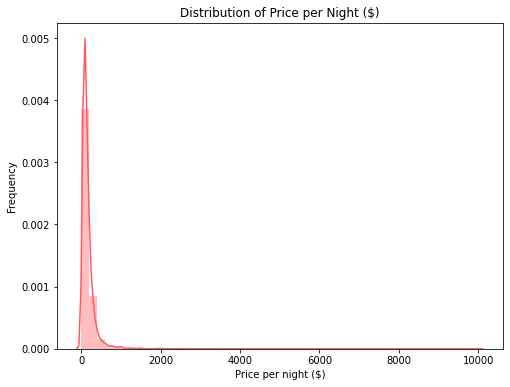

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(nyc_listings['price'], color='#ff5a5f', ax=ax)
plt.title("Distribution of Price per Night ($)")
plt.ylabel('Frequency')
plt.xlabel("Price per night ($)")

In [ ]:
nyc_listings['price'].describe()

count    38277.000000
mean       170.858714
std        305.100271
min          0.000000
25%         70.000000
50%        114.000000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

Price per Night
Mean price is 170.85.Data is skewed to the right. Range of price is 0.00, also there are outliers as cost cannot be 0 per night

In [ ]:
# Top 3 most expensive listings
nyc_listings.sort_values('price', ascending=False)[:3]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bath
23197,f,5.0,t,t,Midtown,40.74863,-73.98493,Room in boutique hotel,Private room,2,...,t,90,3,0,t,4,0,4,0,1.0
19395,f,1.0,t,f,Murray Hill,40.74931,-73.97830,Shared room in loft,Shared room,1,...,t,90,11,0,f,1,0,0,1,2.0
23269,f,11.0,t,t,Midtown,40.76387,-73.97653,Room in boutique hotel,Private room,2,...,t,90,0,0,t,11,0,1,0,1.0


In [ ]:
# Top 3 least expensive listings
nyc_listings.sort_values('price')[:3]


,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,has_availability,availability_90,number_of_reviews,number_of_reviews_ltm,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bath
26268,f,0.0,t,t,Midtown,40.764480,-73.980550,Room in boutique hotel,Hotel room,0,...,t,0,9,6,f,1,0,0,0,1.152714
30039,f,10.0,t,t,Bedford-Stuyvesant,40.696787,-73.958005,Room in hotel,Hotel room,0,...,t,0,0,0,f,1,0,0,0,1.152714
25163,f,12.0,t,t,Upper East Side,40.764420,-73.963030,Room in hotel,Hotel room,6,...,t,0,2,1,f,1,0,0,0,1.152714


In [ ]:
abc = nyc_listings.groupby('accommodates').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
abc.head()

,accommodates,price,calculated_host_listings_count
0,0,0.0,21
1,1,60.0,6579
2,2,99.0,17486
3,3,135.0,3695
4,4,165.0,5863


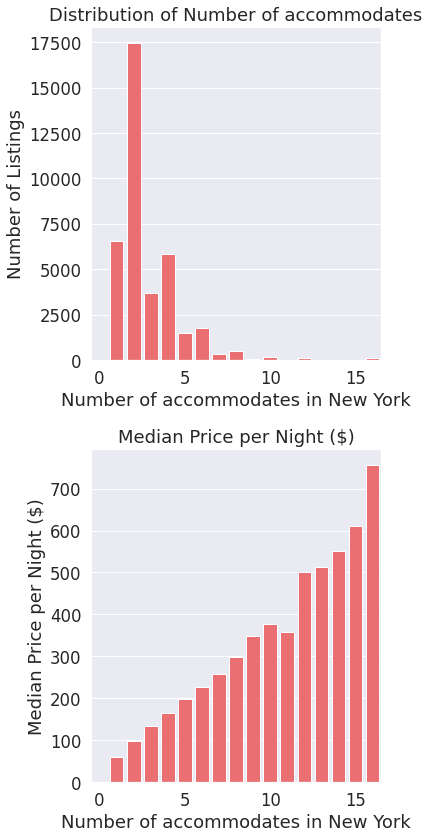

In [ ]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=abc['calculated_host_listings_count'], 
    x=abc['accommodates'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of accommodates')
ax1.set_xlabel('Number of accommodates in New York')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=abc['price'], 
    x=abc['accommodates'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of accommodates in New York')
ax2.set_ylabel('Median Price per Night ($)')

fig.tight_layout()

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [ ]:
xyz = nyc_listings.groupby('beds').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
xyz.head()

,beds,price,calculated_host_listings_count
0,1.000000,90.0,23132
1,1.593527,90.0,2405
2,2.000000,150.0,7932
3,3.000000,189.0,2801
4,4.000000,220.0,1196


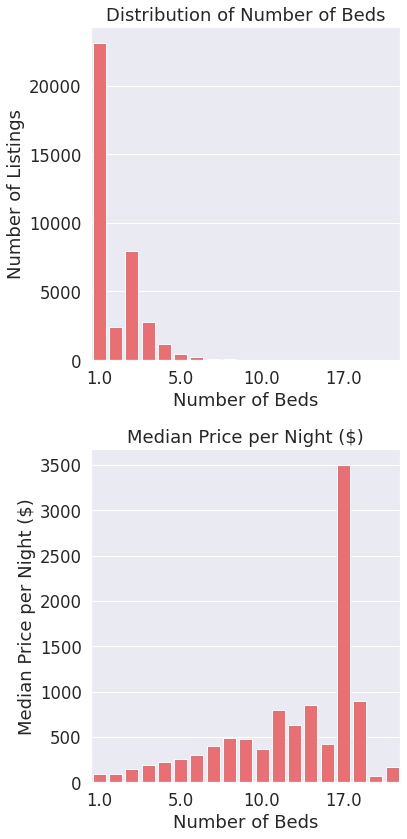

In [ ]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=xyz['calculated_host_listings_count'], 
    x=xyz['beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax1.set_title('Distribution of Number of Beds')
ax1.set_xlabel('Number of Beds')
ax1.set_ylabel('Number of Listings')

plot = sns.barplot(
    y=xyz['price'], 
    x=xyz['beds'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Beds')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)
        
fig.tight_layout()

In [ ]:
df1 = nyc_listings.groupby('bedrooms').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
df1

,bedrooms,price,calculated_host_listings_count
0,1.000000,90.0,26531
1,1.323567,133.0,3975
2,2.000000,180.0,5371
3,3.000000,250.0,1761
4,4.000000,350.0,474
5,5.000000,546.0,108
6,6.000000,744.5,32
7,7.000000,789.5,8
8,8.000000,888.0,9
9,9.000000,900.0,3


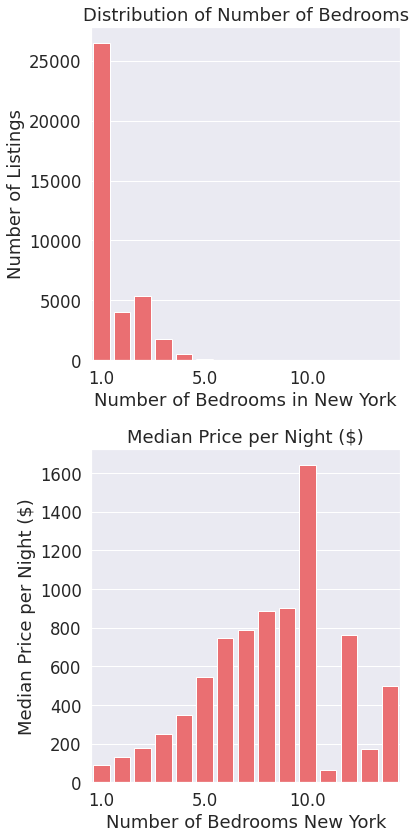

In [ ]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['calculated_host_listings_count'], 
    x=df1['bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bedrooms')
ax1.set_xlabel('Number of Bedrooms in New York')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price'], 
    x=df1['bedrooms'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Bedrooms New York')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0: 
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

In [ ]:
df2=nyc_listings.query(' bedrooms==10')['property_type']
print(df2)

12565    Entire residential home
Name: property_type, dtype: object


In [ ]:
df2=nyc_listings.query(' bedrooms==16')['room_type']
print(df2)

37534    Entire home/apt
Name: room_type, dtype: object


In [ ]:
df1 = nyc_listings.groupby('bath').agg({'price':'median','calculated_host_listings_count':'count'}).reset_index()
df1['bath'] = df1['bath'].round().astype('int64')
df1.head()

,bath,price,calculated_host_listings_count
0,0,80.0,185
1,1,110.0,31952
2,1,85.0,173
3,2,99.0,1752
4,2,161.0,3329


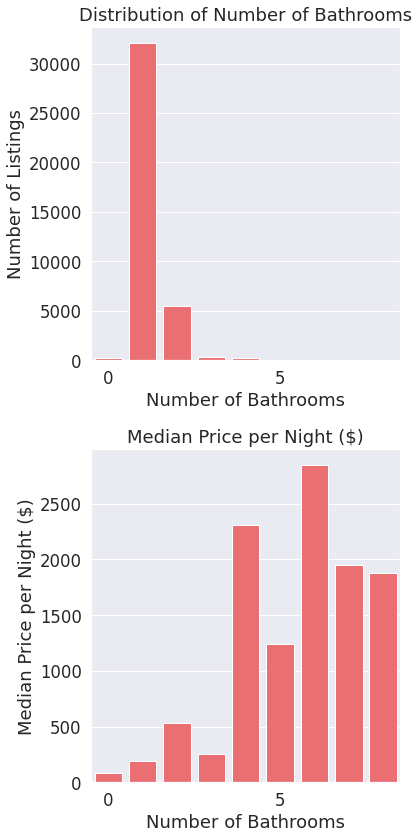

In [ ]:
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))

# plot a bar chart
plot = sns.barplot(
    y=df1['calculated_host_listings_count'], 
    x=df1['bath'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Distribution of Number of Bathrooms')
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Listings')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plot = sns.barplot(
    y=df1['price'], 
    x=df1['bath'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax2);

ax2.set_title('Median Price per Night ($)')
ax2.set_xlabel('Number of Bathrooms')
ax2.set_ylabel('Median Price per Night ($)')

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


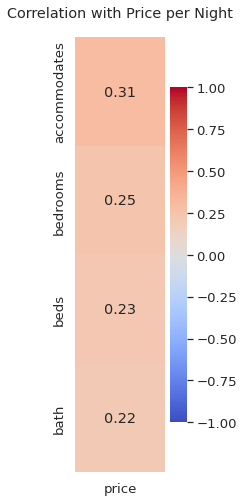

In [ ]:
sns.set(font_scale = 1.2)

# Compute correlations
corr = nyc_listings[['price','accommodates', 'bedrooms','bath',
          'beds']].corr()

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(2, 8))
ax.set_title('Correlation with Price per Night', pad='20')

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr[['price']].sort_values(by=['price'],ascending=False)[1:],
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True);

Neighbourhood

In [ ]:
df1 = nyc_listings.groupby("neighbourhood_cleansed").agg({'calculated_host_listings_count':'count', 'price':'median'}).reset_index()
df1[:5]

,neighbourhood_cleansed,calculated_host_listings_count,price
0,Allerton,33,84.0
1,Arden Heights,4,105.0
2,Arrochar,18,75.0
3,Arverne,89,130.0
4,Astoria,669,80.0


In [ ]:
# Top 5 neighbourhood with lowest price_per_night (where count of listings>10)
df3 = df1[df1['calculated_host_listings_count'] >= 10].sort_values(by="price").reset_index()[:5]
df3[:5]

,index,neighbourhood_cleansed,calculated_host_listings_count,price
0,90,Grant City,13,37.0
1,221,Woodside,394,41.0
2,181,Soundview,13,48.0
3,202,University Heights,20,49.0
4,46,Concord,13,49.0


In [ ]:
# Top 5 neighbourhood with highest price_per_night (where count of listings>10)
df2 = df1[df1['calculated_host_listings_count'] >= 10].sort_values(by="price", ascending=False).reset_index()[:5]
df2

,index,neighbourhood_cleansed,calculated_host_listings_count,price
0,193,Theater District,275,319.0
1,199,Tribeca,141,290.0
2,74,Financial District,470,250.0
3,129,Midtown,1635,230.0
4,146,NoHo,42,222.5


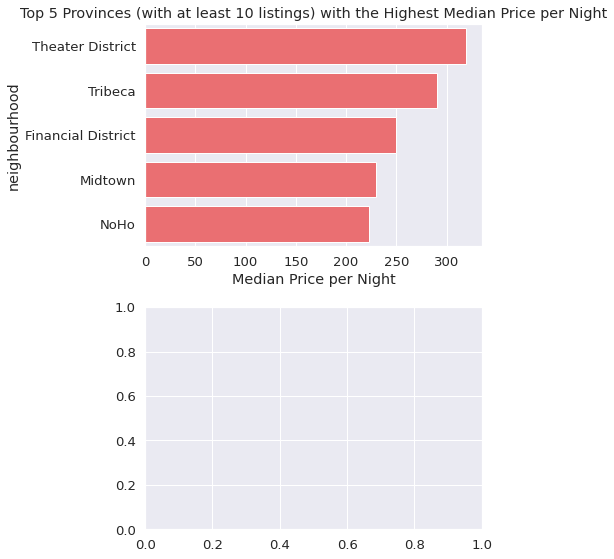

In [ ]:
sns.set(font_scale = 1.2)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# plot a bar chart
sns.barplot(
    y=df2['neighbourhood_cleansed'], 
    x=df2['price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Provinces (with at least 10 listings) with the Highest Median Price per Night')
ax1.set_xlabel('Median Price per Night')
ax1.set_ylabel('neighbourhood')


fig.tight_layout()

In [ ]:
# Top 5 most expensive Airbnb types
df1 = nyc_listings.groupby("property_type").agg({'price':'median','calculated_host_listings_count':'count'}).sort_values(by="price", ascending=False).reset_index()
df1[:5]


,property_type,price,calculated_host_listings_count
0,Tower,3333.0,1
1,Shared room in island,1296.0,1
2,Castle,900.0,1
3,Tent,750.0,1
4,Private room in lighthouse,700.0,1


In [ ]:
# Top 5 most expensive Airbnb types with more than 10 listings
df2 = df1[df1['calculated_host_listings_count']>=10].sort_values(by="price", ascending= False)[:5]
df2

,property_type,price,calculated_host_listings_count
7,Private room in resort,529.0,33
10,Room in boutique hotel,315.0,487
11,Room in hotel,299.5,658
14,Entire serviced apartment,239.0,308
17,Entire loft,220.0,629


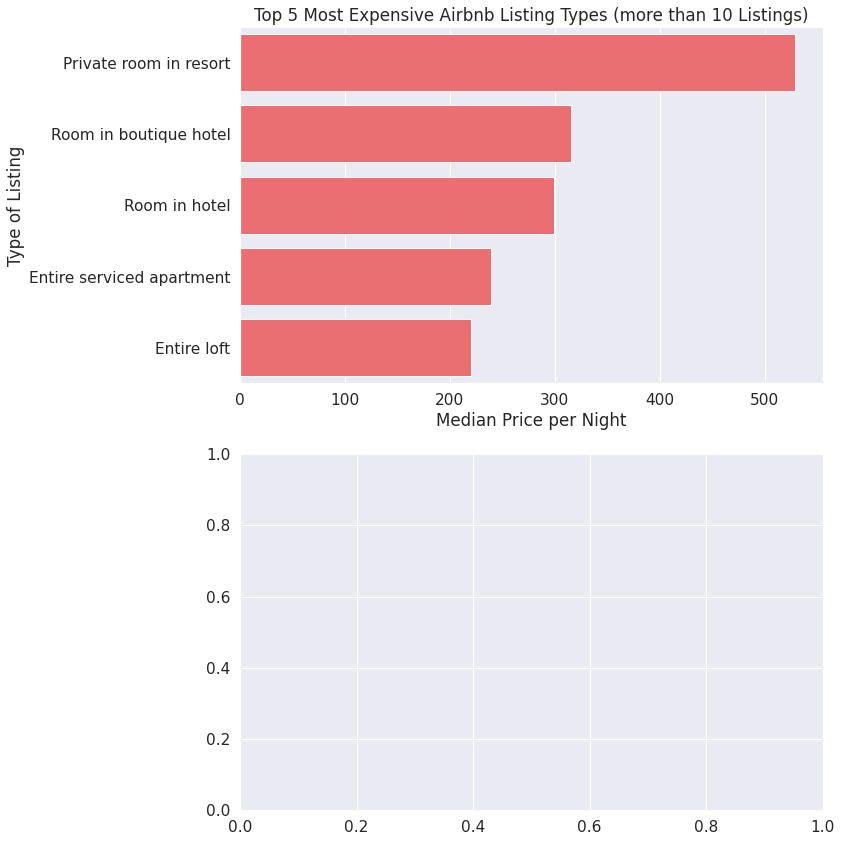

In [ ]:
sns.set(font_scale = 1.4)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot a bar chart
sns.barplot(
    y=df2['property_type'], 
    x=df2['price'],  
    estimator=sum, 
    ci=None, 
    color='#ff5a5f',
    ax=ax1);

ax1.set_title('Top 5 Most Expensive Airbnb Listing Types (more than 10 Listings)')
ax1.set_xlabel('Median Price per Night')
ax1.set_ylabel('Type of Listing')



fig.tight_layout()

##Feature Engineering

Encoding for categorical variables

In [ ]:
df_num = nyc_listings.select_dtypes(exclude=[np.number])
df_num

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,has_availability,instant_bookable
0,f,t,t,Midtown,Entire rental unit,Entire home/apt,t,f
1,f,t,t,Bedford-Stuyvesant,Entire guest suite,Entire home/apt,t,f
2,f,t,t,Bedford-Stuyvesant,Private room in rental unit,Private room,t,f
3,f,t,t,Sunset Park,Entire rental unit,Entire home/apt,t,f
4,f,t,f,Midtown,Private room in rental unit,Private room,t,f
...,...,...,...,...,...,...,...,...
38272,f,t,t,Port Richmond,Private room in residential home,Private room,t,f
38273,f,t,t,Port Richmond,Private room in residential home,Private room,t,f
38274,f,t,t,Midtown,Private room in serviced apartment,Private room,t,t
38275,f,t,t,Midtown,Private room in serviced apartment,Private room,t,t


# Encode binary outcomes 

In [ ]:
# Encode binary outcomes 
binary_cols=['instant_bookable','has_availability', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']
for col in binary_cols:
    nyc_listings[col]  = nyc_listings[col].map({'t': 1, 'f': 0 })

# Encode multi-categorical outcomes 
multi_cols=['neighbourhood_cleansed','property_type','room_type']
nyc_listings =pd.get_dummies(data=nyc_listings, columns=multi_cols,drop_first=True)

In [ ]:
nyc_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in rental unit,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,8.0,1,1,40.753560,-73.985590,1,1.323567,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,1,1,40.684940,-73.957650,3,1.000000,3.000000,75.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1,1,40.685350,-73.955120,2,1.000000,1.000000,60.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,1,1,40.662650,-73.994540,4,2.000000,2.000000,275.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,1,0,40.764570,-73.983170,2,1.000000,1.000000,68.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,0,1.0,1,1,40.632222,-74.136715,2,1.000000,1.593527,79.0,...,0,0,0,0,0,0,0,0,1,0
38273,0,1.0,1,1,40.630502,-74.136142,2,1.000000,1.593527,76.0,...,0,0,0,0,0,0,0,0,1,0
38274,0,10.0,1,1,40.753887,-73.980536,2,1.000000,1.000000,116.0,...,0,0,0,0,0,0,0,0,1,0
38275,0,10.0,1,1,40.755569,-73.981976,2,1.000000,1.000000,106.0,...,0,0,0,0,0,0,0,0,1,0


#Outliers Check

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


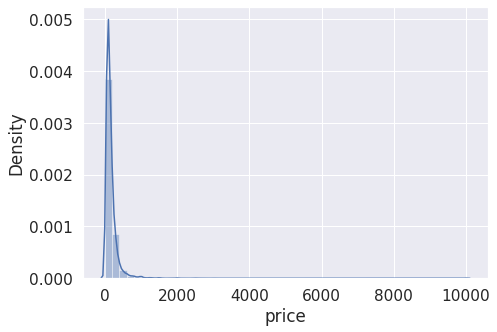

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(nyc_listings['price'])
plt.show()

In [ ]:
print("Mean value of cgpa",nyc_listings['price'].mean())
print("Std value of cgpa",nyc_listings['price'].std())
print("Min value of cgpa",nyc_listings['price'].min())
print("Max value of cgpa",nyc_listings['price'].max())

Mean value of cgpa 170.85871411030124
Std value of cgpa 305.1002706439027
Min value of cgpa 0.0
Max value of cgpa 10000.0


In [ ]:
# Finding the boundary values
print("Highest allowed",nyc_listings['price'].mean() + 3*nyc_listings['price'].std())
print("Lowest allowed",nyc_listings['price'].mean() - 3*nyc_listings['price'].std())

Highest allowed 1086.1595260420095
Lowest allowed -744.442097821407


In [ ]:
# Finding the outliers

nyc_listings[(nyc_listings['price'] > 1086.15) | (nyc_listings['price'] < -744.44)]

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in rental unit,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room
291,1,14.0,1,1,40.775100,-73.985950,9,2.0,3.000000,2500.0,...,0,0,0,0,0,0,0,0,0,0
639,0,1.0,1,1,40.721520,-73.992790,1,1.0,1.593527,1300.0,...,0,0,0,0,0,0,0,0,1,0
793,0,1.0,1,0,40.766910,-73.983610,16,1.0,1.000000,2000.0,...,1,0,0,0,0,0,0,0,0,1
851,1,14.0,1,1,40.774930,-73.987320,8,2.0,3.000000,2500.0,...,0,0,0,0,0,0,0,0,0,0
1154,0,2.0,1,1,40.726940,-73.981730,10,4.0,4.000000,2979.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38027,0,0.0,1,1,40.713324,-74.010146,12,6.0,10.000000,2600.0,...,0,0,0,0,0,0,0,0,0,0
38149,0,17.0,1,1,40.746187,-73.986889,5,1.0,3.000000,5655.0,...,0,0,0,0,0,0,0,0,1,0
38153,0,0.0,1,1,40.710918,-73.959553,6,2.0,2.000000,1980.0,...,0,0,0,0,0,0,0,0,0,0
38192,1,1.0,1,0,40.753119,-74.003459,6,3.0,4.000000,2000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Trimming
nyc_listings = nyc_listings[(nyc_listings['price'] < 1086) & (nyc_listings['price'] > -744.44)]
nyc_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in rental unit,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,8.0,1,1,40.753560,-73.985590,1,1.323567,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,1,1,40.684940,-73.957650,3,1.000000,3.000000,75.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1,1,40.685350,-73.955120,2,1.000000,1.000000,60.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,1,1,40.662650,-73.994540,4,2.000000,2.000000,275.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,1,0,40.764570,-73.983170,2,1.000000,1.000000,68.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,0,1.0,1,1,40.632222,-74.136715,2,1.000000,1.593527,79.0,...,0,0,0,0,0,0,0,0,1,0
38273,0,1.0,1,1,40.630502,-74.136142,2,1.000000,1.593527,76.0,...,0,0,0,0,0,0,0,0,1,0
38274,0,10.0,1,1,40.753887,-73.980536,2,1.000000,1.000000,116.0,...,0,0,0,0,0,0,0,0,1,0
38275,0,10.0,1,1,40.755569,-73.981976,2,1.000000,1.000000,106.0,...,0,0,0,0,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


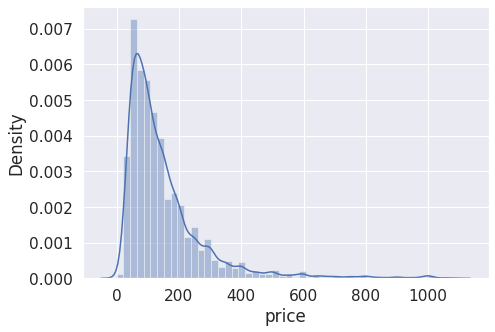

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(nyc_listings['price'])
plt.show()

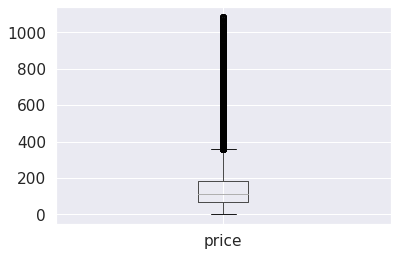

In [ ]:
boxplot = nyc_listings.boxplot(column=['price'])

In [ ]:
nyc_listings

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,...,property_type_Shared room in rental unit,property_type_Shared room in residential home,property_type_Shared room in serviced apartment,property_type_Shared room in townhouse,property_type_Tent,property_type_Tiny house,property_type_Tower,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,8.0,1,1,40.753560,-73.985590,1,1.323567,1.000000,150.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,1,1,40.684940,-73.957650,3,1.000000,3.000000,75.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,1,1,40.685350,-73.955120,2,1.000000,1.000000,60.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,1,1,40.662650,-73.994540,4,2.000000,2.000000,275.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,1,0,40.764570,-73.983170,2,1.000000,1.000000,68.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,0,1.0,1,1,40.632222,-74.136715,2,1.000000,1.593527,79.0,...,0,0,0,0,0,0,0,0,1,0
38273,0,1.0,1,1,40.630502,-74.136142,2,1.000000,1.593527,76.0,...,0,0,0,0,0,0,0,0,1,0
38274,0,10.0,1,1,40.753887,-73.980536,2,1.000000,1.000000,116.0,...,0,0,0,0,0,0,0,0,1,0
38275,0,10.0,1,1,40.755569,-73.981976,2,1.000000,1.000000,106.0,...,0,0,0,0,0,0,0,0,1,0


#Modelling

Splitting Data


In [ ]:
# Splitting data into Input and Target Variable

y = nyc_listings[['price']]  # target variable i.e diabetic or not
X = nyc_listings.drop(['price'], axis=1)  # input variables

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
#Scaler/normalize 
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [ ]:
X.shape

(37963, 324)

#Filter Method

Step:1 Removing Constant features

In [ ]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
print(constant_features)

X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)

X_train.shape, X_test.shape

['neighbourhood_cleansed_Country Club', 'neighbourhood_cleansed_Huguenot', 'property_type_Castle', 'property_type_Private room in castle', 'property_type_Private room in dorm', 'property_type_Private room in train', 'property_type_Shared room in bungalow', 'property_type_Shared room in island', 'property_type_Tower']


((30370, 315), (7593, 315))

Step 2: Removing Quasi-Constant Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# remove quasi-constant features
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

sum(sel.get_support()) # how many not quasi-constant?

57

In [ ]:
features_to_keep = X_train.columns[sel.get_support()]

In [ ]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((30370, 57), (7593, 57))

Step 3 Removing Duplicate Columns

In [ ]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [ ]:
#Remove duplicated features
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50


0

In [ ]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((30370, 57), (7593, 57))

In [ ]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  2


In [ ]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((30370, 55), (7593, 55))

In [ ]:
for feat in X_train:
    if X_train[feat].isnull().mean() > 0:
        print(X_train[feat])

In [ ]:
for feat in X_test:
    if X_test[feat].isnull().mean() > 0:
        print(X_test[feat])

XGBoost Regressor

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rfcm = xgb.XGBRegressor().fit(X_train, y_train)

[18:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred = rfcm.predict(X_test) 

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print('Mean squared error after filter method: ', mse)
print('R2 after filter method: ', r2)

Mean squared error after filter method:  9765.112389616532
R2 after filter method:  0.5026759738336868


In [ ]:
import xgboost as xgb

In [ ]:
# the first step of this procedure consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBRegressor(
    nthread=5, max_depth=4, n_estimators=500, learning_rate=0.05)

model_all_features.fit(X_train, y_train)

# calculate the r2 in the test set
y_pred_test = model_all_features.predict(X_test)
mse =mean_squared_error(y_test, y_pred_test)
r2_score_all = r2_score(y_test, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))
print('Test all features xgb mse = %f' % (mse))

[18:44:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test all features xgb R2 = 0.564085
Test all features xgb mse = 8559.322883


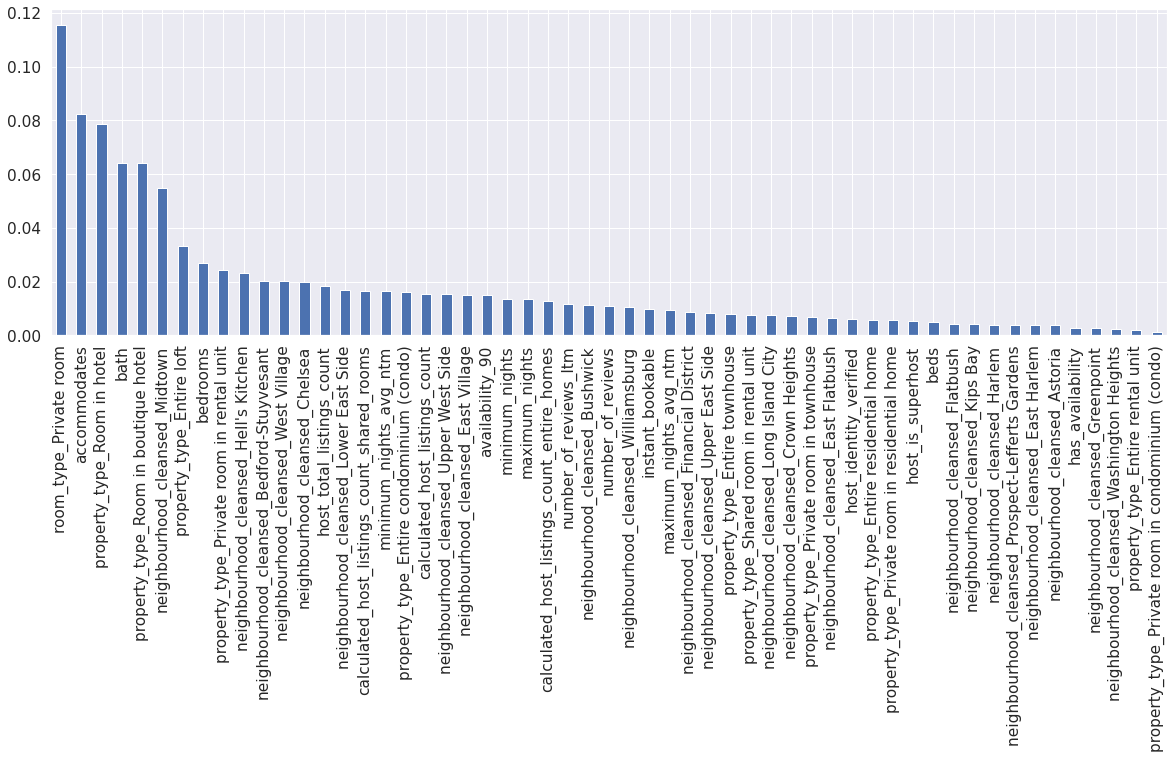

In [ ]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [ ]:
# view the list of ordered features
features = list(features.index)
features

['room_type_Private room',
 'accommodates',
 'property_type_Room in hotel',
 'bath',
 'property_type_Room in boutique hotel',
 'neighbourhood_cleansed_Midtown',
 'property_type_Entire loft',
 'bedrooms',
 'property_type_Private room in rental unit',
 "neighbourhood_cleansed_Hell's Kitchen",
 'neighbourhood_cleansed_Bedford-Stuyvesant',
 'neighbourhood_cleansed_West Village',
 'neighbourhood_cleansed_Chelsea',
 'host_total_listings_count',
 'neighbourhood_cleansed_Lower East Side',
 'calculated_host_listings_count_shared_rooms',
 'minimum_nights_avg_ntm',
 'property_type_Entire condominium (condo)',
 'calculated_host_listings_count',
 'neighbourhood_cleansed_Upper West Side',
 'neighbourhood_cleansed_East Village',
 'availability_90',
 'minimum_nights',
 'maximum_nights',
 'calculated_host_listings_count_entire_homes',
 'number_of_reviews_ltm',
 'neighbourhood_cleansed_Bushwick',
 'number_of_reviews',
 'neighbourhood_cleansed_Williamsburg',
 'instant_bookable',
 'maximum_nights_avg_ntm'

In [ ]:

#fitting the data
from xgboost import XGBRegressor
regressor1 = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)#tuning the parameters
regressor1.fit(X_train, y_train)

[18:44:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, gamma=0.1, max_depth=5, min_child_weight=2,
             n_estimators=200, nthread=6, random_state=42, seed=27,
             subsample=0.9)

In [ ]:
y_pred=regressor1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print(regressor1.score(X_train, y_train))
MSE = mean_squared_error(y_test, y_pred)
print(MSE)
rmse=MSE**(0.5)
print(rmse)
r2= r2_score(y_test, y_pred)
print(r2)

0.6884203182747884
8243.48277432342
90.79362738828877
0.5801705214044992


Recursive elimination using XGBoost Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import xgboost as xgb

In [ ]:
# the first step of this procedure consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)

model_all_features.fit(X_train, y_train)

# calculate the r2 in the test set
y_pred_test = model_all_features.predict(X_test)
mse =mean_squared_error(y_test, y_pred_test)
r2_score_all = r2_score(y_test, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))
print('Test all features xgb mse = %f' % (mse))

[18:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test all features xgb R2 = 0.580171
Test all features xgb mse = 8243.482774


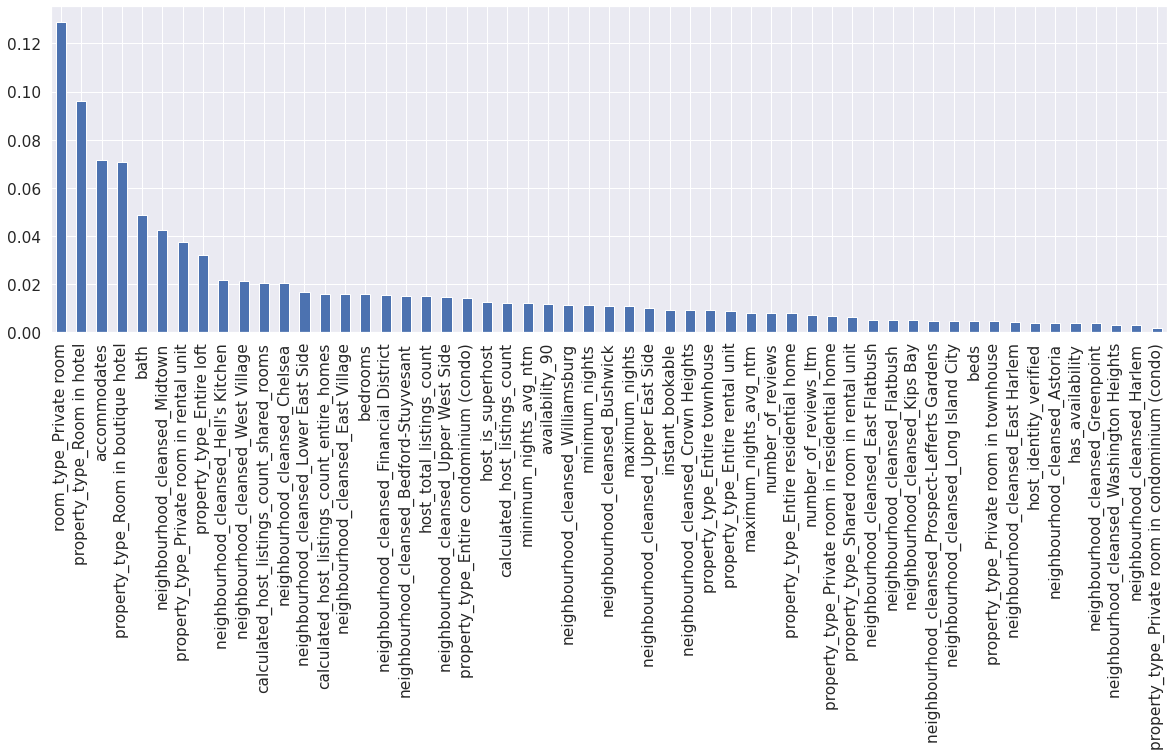

In [ ]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [ ]:
# view the list of ordered features
features = list(features.index)
features

['room_type_Private room',
 'property_type_Room in hotel',
 'accommodates',
 'property_type_Room in boutique hotel',
 'bath',
 'neighbourhood_cleansed_Midtown',
 'property_type_Private room in rental unit',
 'property_type_Entire loft',
 "neighbourhood_cleansed_Hell's Kitchen",
 'neighbourhood_cleansed_West Village',
 'calculated_host_listings_count_shared_rooms',
 'neighbourhood_cleansed_Chelsea',
 'neighbourhood_cleansed_Lower East Side',
 'calculated_host_listings_count_entire_homes',
 'neighbourhood_cleansed_East Village',
 'bedrooms',
 'neighbourhood_cleansed_Financial District',
 'neighbourhood_cleansed_Bedford-Stuyvesant',
 'host_total_listings_count',
 'neighbourhood_cleansed_Upper West Side',
 'property_type_Entire condominium (condo)',
 'host_is_superhost',
 'calculated_host_listings_count',
 'minimum_nights_avg_ntm',
 'availability_90',
 'neighbourhood_cleansed_Williamsburg',
 'minimum_nights',
 'neighbourhood_cleansed_Bushwick',
 'maximum_nights',
 'neighbourhood_cleansed_U

In [ ]:
tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.9,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=6,
              scale_pos_weight=1,
              seed=27,verbosity=1)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict(
        X_test.drop(features_to_remove + [feature], axis=1))

    # calculate the new r2
    r2_score_int = r2_score(y_test, y_pred_test)
    print('New Test r2 = {}'.format((r2_score_int)))

    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_score_all)))

    # determine the drop in the r2
    diff_r2 = r2_score_all - r2_score_int

    # compare the drop in r2 with the tolerance
    # we set previously
    if diff_r2 >= tol:
        print('Drop in r2 ={}'.format(diff_r2))
        print('keep: ', feature)
        print
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in the r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_score_all = r2_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  room_type_Private room  which is feature  1  out of  55
[18:45:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.5774996804807029
All features Test r2 = 0.5801705214044992
Drop in r2 =0.002670840923796325
keep:  room_type_Private room

testing feature:  property_type_Room in hotel  which is feature  2  out of  55
[18:45:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.578063575982116
All features Test r2 = 0.5801705214044992
Drop in r2 =0.0021069454223832107
keep:  property_type_Room in hotel

testing feature:  accommodates  which is feature  3  out of  55
[18:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.5711499310247214
All features Test r2 = 0.5801705214044992
Drop in

In [ ]:
# capture the  selected features
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model
final_xgb = xgb.XGBRegressor(learning_rate =0.1,
              n_estimators=200,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'reg:linear',random_state=42,
              nthread=4,
              scale_pos_weight=1,
              seed=27,verbosity=1)

# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = final_xgb.predict(X_test[features_to_keep])

# calculate roc-auc
r2_score_final = r2_score(y_test, y_pred_test)
print('Test selected features r2 = %f' % (r2_score_final))
print('Test all features r2 = %f' % (r2_score_all))

[18:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test selected features r2 = 0.577195
Test all features r2 = 0.583092


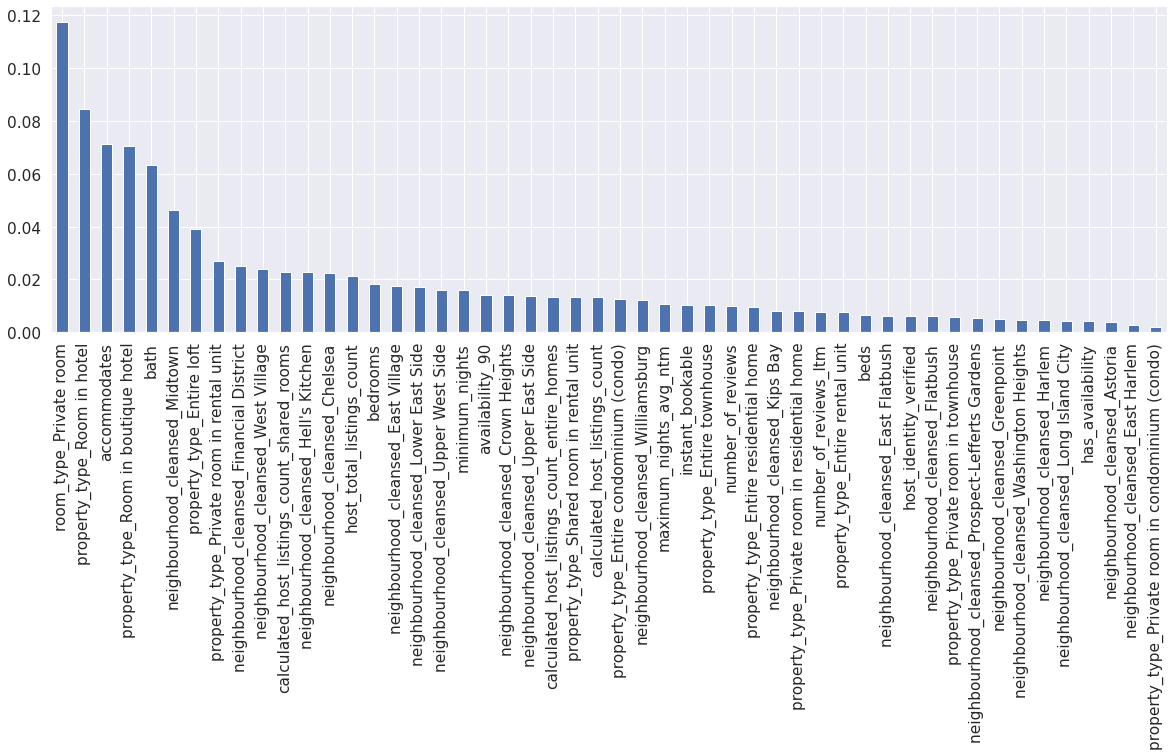

In [ ]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(final_xgb.feature_importances_)
features.index = X_train[features_to_keep].columns

# sort the features by importance
features.sort_values(ascending=False, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [ ]:
# view the list of ordered features
features = list(features.index)
features

['room_type_Private room',
 'property_type_Room in hotel',
 'accommodates',
 'property_type_Room in boutique hotel',
 'bath',
 'neighbourhood_cleansed_Midtown',
 'property_type_Entire loft',
 'property_type_Private room in rental unit',
 'neighbourhood_cleansed_Financial District',
 'neighbourhood_cleansed_West Village',
 'calculated_host_listings_count_shared_rooms',
 "neighbourhood_cleansed_Hell's Kitchen",
 'neighbourhood_cleansed_Chelsea',
 'host_total_listings_count',
 'bedrooms',
 'neighbourhood_cleansed_East Village',
 'neighbourhood_cleansed_Lower East Side',
 'neighbourhood_cleansed_Upper West Side',
 'minimum_nights',
 'availability_90',
 'neighbourhood_cleansed_Crown Heights',
 'neighbourhood_cleansed_Upper East Side',
 'calculated_host_listings_count_entire_homes',
 'property_type_Shared room in rental unit',
 'calculated_host_listings_count',
 'property_type_Entire condominium (condo)',
 'neighbourhood_cleansed_Williamsburg',
 'maximum_nights_avg_ntm',
 'instant_bookable',